<a href="https://colab.research.google.com/github/DhafinRA/ML-Upatik/blob/main/Food_Classification_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import random
import os
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

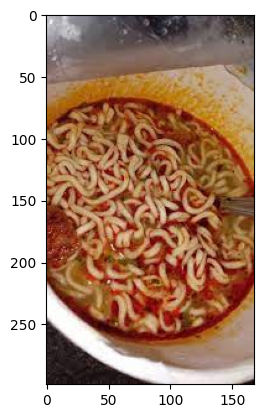

In [52]:
# Read Images
img = mpimg.imread('Dataset\\Train\Mie Instan\\mie80.jpg')

# Output Images
plt.imshow(img)

In [53]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                            horizontal_flip=True,
                                                            vertical_flip=True,
                                                            rotation_range=60,
                                                            width_shift_range=0.8,
                                                            height_shift_range=0.8,)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

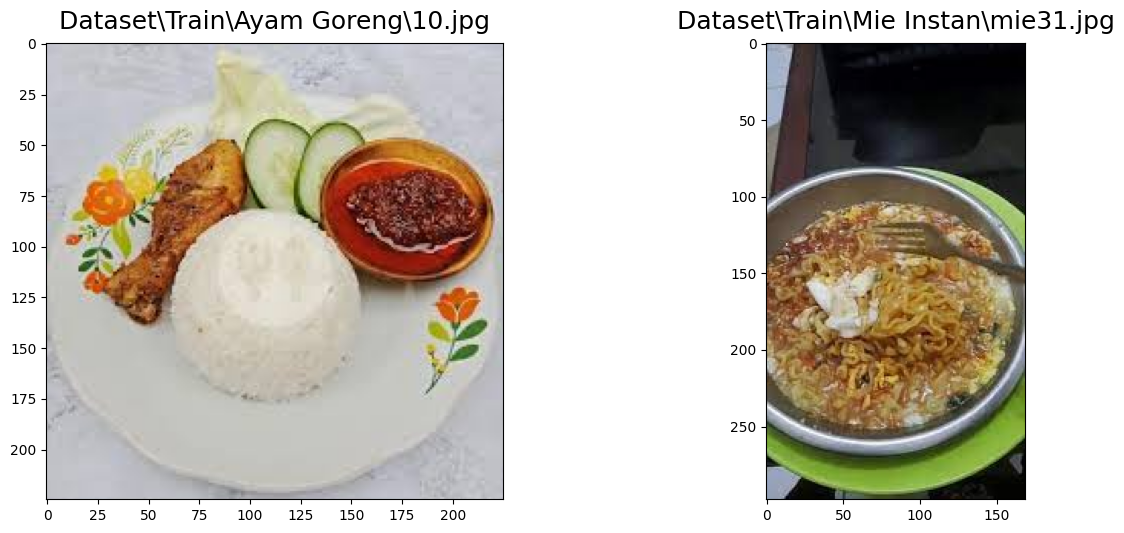

In [54]:
train_dir = "Dataset\Train"
test_dir = "Dataset\Test"
images = []

for food_folder in sorted(os.listdir(train_dir)):
    food_items = os.listdir(train_dir + '/' + food_folder)
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_dir,food_folder,food_selected))

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-1]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [55]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=10,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=2,
                                                    class_mode='binary')

Found 159 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)
# history = model.fit(train_generator,epochs=20)

Epoch 1/20


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6988\2339184371.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)


16/16 [==============================] - 5s 210ms/step - loss: 0.7255 - accuracy: 0.4969 - val_loss: 0.6963 - val_accuracy: 0.4048
Epoch 2/20
16/16 [==============================] - 3s 185ms/step - loss: 0.6915 - accuracy: 0.5031 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 3/20
16/16 [==============================] - 3s 203ms/step - loss: 0.6997 - accuracy: 0.5031 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 4/20
16/16 [==============================] - 3s 186ms/step - loss: 0.6950 - accuracy: 0.4843 - val_loss: 0.6896 - val_accuracy: 0.5714
Epoch 5/20
16/16 [==============================] - 3s 186ms/step - loss: 0.6813 - accuracy: 0.5409 - val_loss: 0.6767 - val_accuracy: 0.6429
Epoch 6/20
16/16 [==============================] - 3s 182ms/step - loss: 0.6947 - accuracy: 0.5723 - val_loss: 0.6766 - val_accuracy: 0.5000
Epoch 7/20
16/16 [==============================] - 3s 184ms/step - loss: 0.6871 - accuracy: 0.4717 - val_loss: 0.6887 - val_accuracy: 0.6667
Epoch 8/20
16/16 

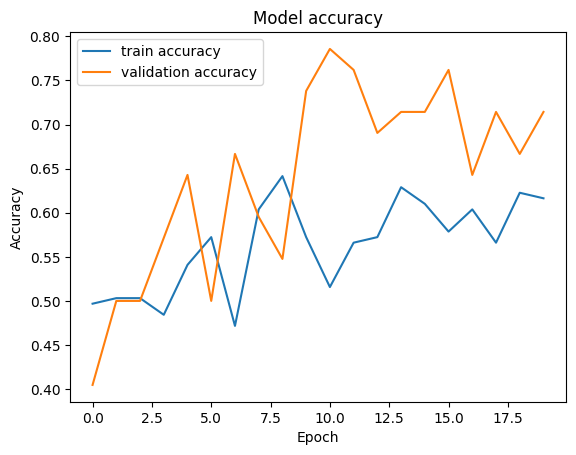

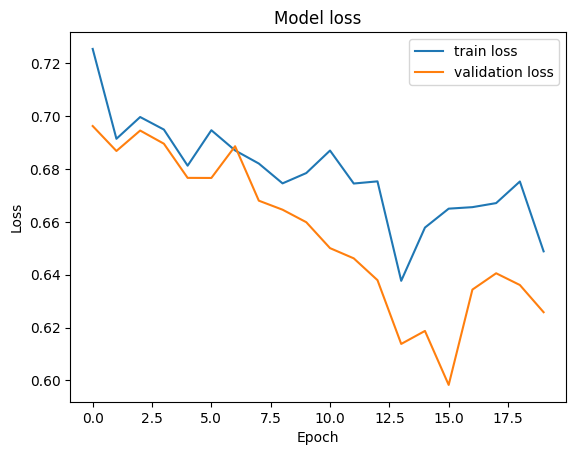

In [61]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.plot(history.history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_InceptionV3')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_InceptionV3')
    plt.show()

plot_accuracy(history)
plot_loss(history)